# Multi-Layer Perceptron, MNIST 

---
In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database using many different optimizers. Then we finally compare the performance of various optimizers graphically.

The process will be broken down into the following st  eps:
 
1. Load and visualize the data.
2. Define a neural network.
3. Train the model using various optimizers.
4. Evaluate the performance of our trained model on a test dataset.

Firstly, importing the necessary libraries for working with data and PyTorch.

In [ ]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading the dataset and its progress is seen as the data is loading.If more data have to be loaded at a time then we can change the `batch_size`.

Here DataLoaders for each of our datasets will be created.

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms


num_workers = 0# count of subprocesses required in dataloading

batch_size = 100 # per batch no. of samples to load

# Apply pre-processing transforms
resized_img_size = 14 # square
# (downscale the image from 28*28 to 20*20)
transform = transforms.Compose(
    [transforms.Resize(size=(resized_img_size, resized_img_size)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])# (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

At the beginning of the classification task, it is necessary to take a look at the data and ensure that it is loaded in correctly and then observe initial patterns in that data.

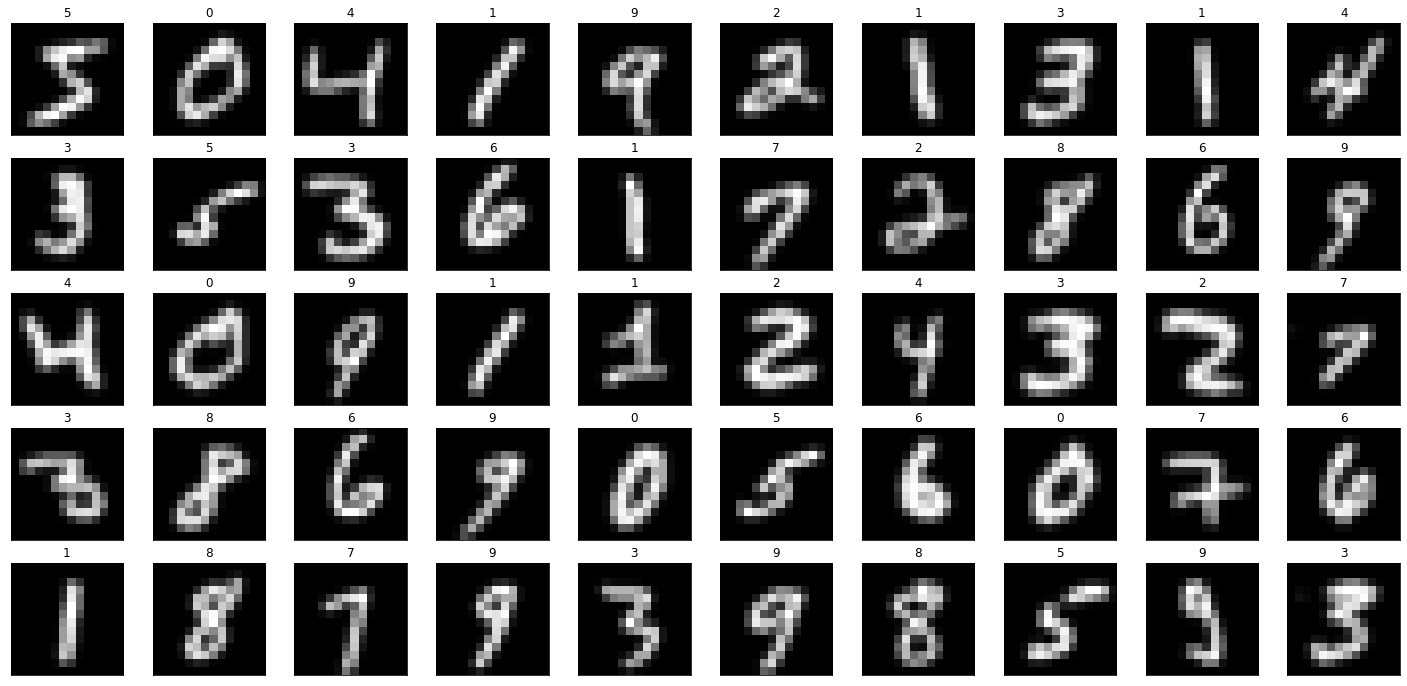

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 12))
for idx in np.arange(min(batch_size, 50)):
    ax = fig.add_subplot(5, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [ ]:
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(resized_img_size*resized_img_size, 64) # nn.Linear(28 * 28, 1000)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)


    def forward(self, x):
        # flatten image input
        x = x.view(-1, resized_img_size * resized_img_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # torch.sigmoid(self.fc3(x))
        return x


---
## Train the Network

Here learning/training of the model is being done.

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [ ]:
from ADAM import ADAM

In [ ]:
trainingLoss = {}
# Fixed seed for random weight initialization (to keep the weights same for all
# the models)
# seed = 11 



def trainDifOptimizer(optmzr):
    # torch.manual_seed(seed)
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = None
    if optmzr=='ADAM':
      optimizer = ADAM(model.parameters(), lr=0.01) # lr=0.001 -> standard
    else:
      optimizer = getattr(torch.optim, optmzr)(model.parameters(), lr=0.01)
    
    n_epochs = 5  # suggest training between 20-50 epochs

    model.train()  # prep model for training
    trainLossForOptimizer = []
    print("Optimizer : ", optmzr, "\n")
    for epoch in range(n_epochs):
        train_loss = 0.0

        for data, target in train_loader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)

        # print training statistics
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        trainLossForOptimizer.append(train_loss)
        
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1,
            train_loss
        ))
    torch.save(model, 'saved_models/'+optmzr+'_model')
    trainingLoss[optmzr] = trainLossForOptimizer
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam', 'RMSprop','SGD','Adadelta']

for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)

print(trainingLoss)
  

Optimizer :  Adam 

Epoch: 1 	Training Loss: 0.450903
Epoch: 2 	Training Loss: 0.252236
Epoch: 3 	Training Loss: 0.214727
Epoch: 4 	Training Loss: 0.193976
Epoch: 5 	Training Loss: 0.185964

-----------------------------------------

Optimizer :  RMSprop 

Epoch: 1 	Training Loss: 0.653887
Epoch: 2 	Training Loss: 0.313866
Epoch: 3 	Training Loss: 0.264720
Epoch: 4 	Training Loss: 0.236821
Epoch: 5 	Training Loss: 0.224031

-----------------------------------------

Optimizer :  SGD 

Epoch: 1 	Training Loss: 2.075853
Epoch: 2 	Training Loss: 1.128256
Epoch: 3 	Training Loss: 0.644913
Epoch: 4 	Training Loss: 0.492664
Epoch: 5 	Training Loss: 0.432351

-----------------------------------------

Optimizer :  Adadelta 

Epoch: 1 	Training Loss: 2.210567
Epoch: 2 	Training Loss: 1.922002
Epoch: 3 	Training Loss: 1.545377
Epoch: 4 	Training Loss: 1.241887
Epoch: 5 	Training Loss: 1.034642

-----------------------------------------

{'Adam': [0.4509034397949775, 0.2522364264323066, 0.214727

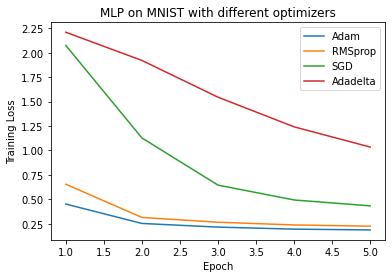

In [ ]:
Xval = np.arange(1, 6)

plt.xlabel("Epoch")  # add X-axis label
plt.ylabel("Training Loss")  # add Y-axis label
plt.title("MLP on MNIST with different optimizers")  # add title

for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
plt.show()

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. We will do detailed analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

Following steps will be taken:

1. forward pass: compute predicted outputs by passing inputs to the model
2. calculate the loss
3. update test loss
4. compare predictions to true label
5. calculate test accuracy for each object class


In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model = torch.load('saved_models/RMSprop_model')
criterion = nn.CrossEntropyLoss()
model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # compare predictions to true label
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.294095

Test Accuracy of     0: 98% (961/980)
Test Accuracy of     1: 98% (1115/1135)
Test Accuracy of     2: 92% (951/1032)
Test Accuracy of     3: 96% (970/1010)
Test Accuracy of     4: 94% (930/982)
Test Accuracy of     5: 85% (760/892)
Test Accuracy of     6: 92% (883/958)
Test Accuracy of     7: 72% (746/1028)
Test Accuracy of     8: 92% (903/974)
Test Accuracy of     9: 94% (958/1009)

Test Accuracy (Overall): 91% (9177/10000)


### Visualize Sample Test Results

This cell displays test images and their labels in a way that the text will be green for accurately classified examples and red for incorrect predictions.

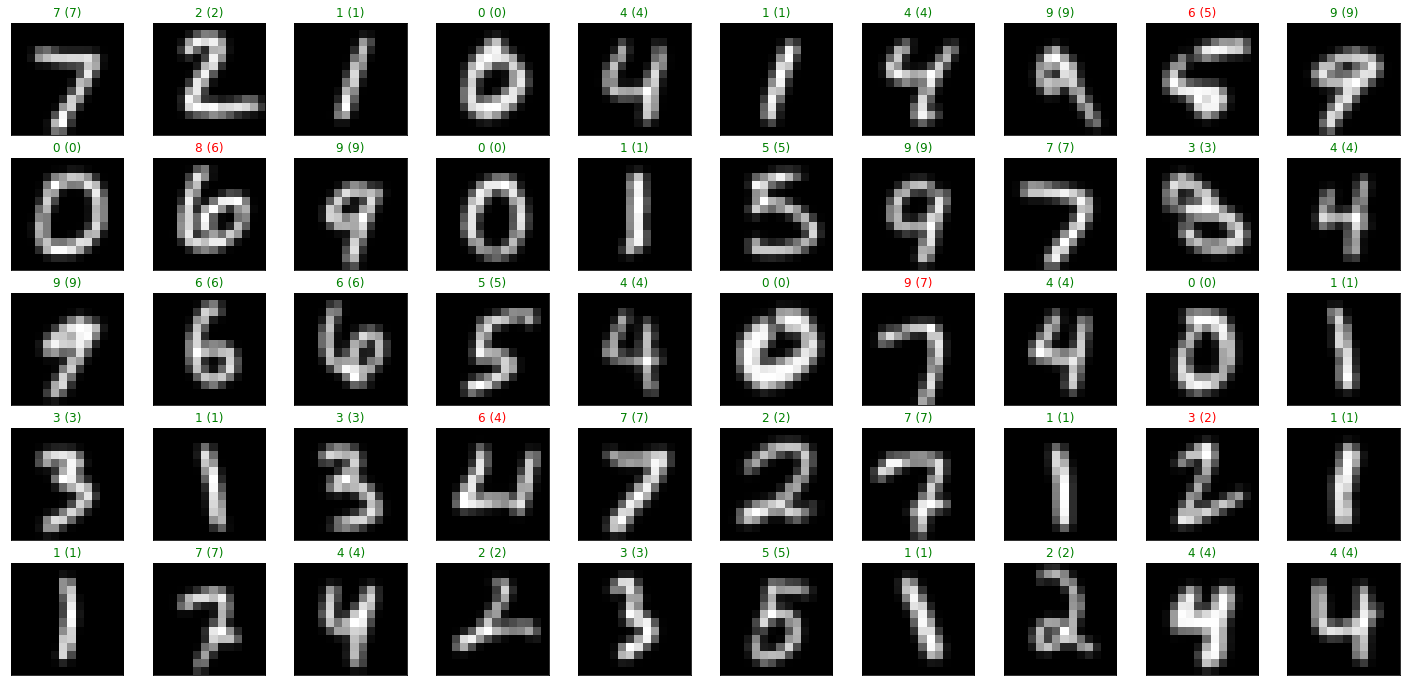

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 12))
for idx in np.arange(50):
    ax = fig.add_subplot(5, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))